In [51]:
%pwd

'D:\\Data Science\\Python Data Science and Machine Learning Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\Logistic-Regression'


# In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. 

### Here we are going to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("advertising.csv") 

In [3]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df = data
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df['Age'].unique()
df['Area Income'].isnull().value_counts()
df['Daily Internet Usage'].isnull().value_counts()
df['Ad Topic Line'].isnull().value_counts()
df['City'].unique()
df['Male'].isnull().value_counts()
df['Country'].isnull().value_counts()
df['Timestamp'].isnull().value_counts()
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [8]:
import seaborn as sns

In [9]:
    #df['Daily Time Spent on Site'].isnull().value_counts()

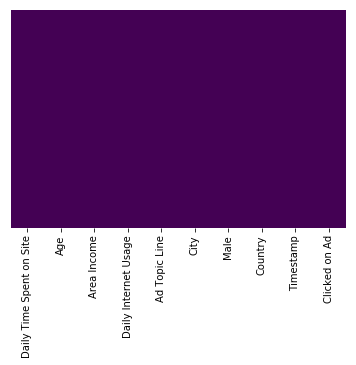

In [10]:
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False , cbar = False)

#This means that there are no null/nan values in the dataset

In [11]:
df.corr()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


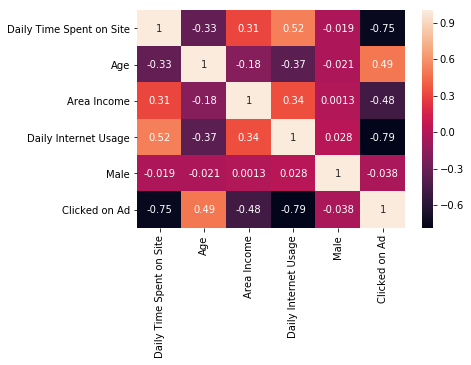

In [12]:
sns.heatmap(df.corr(), annot = True)

In [40]:
factors = df[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Area Income','Male']]
label =   df['Clicked on Ad']
label.head(3)

0    0
1    0
2    0
Name: Clicked on Ad, dtype: int64

# Modelling the Logistic regression model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(factors, label)

In [42]:
X_test.count()

y_test.count()
y_train.count()


750

In [43]:
#X_train

In [44]:
#X_test

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(C = 1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
ans = model.predict(X_test)

# Evaluation

In [49]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy:")
print(metrics.accuracy_score(y_test, ans))
print("\n")
print("\n")

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, ans))
print("\n")
print("\n")

print("Classification Report")
print(classification_report(y_test,ans))

Accuracy:
0.9




Confusion Matrix
[[ 96   4]
 [ 21 129]]




Classification Report
             precision    recall  f1-score   support

          0       0.82      0.96      0.88       100
          1       0.97      0.86      0.91       150

avg / total       0.91      0.90      0.90       250

